In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
#resetting system limits
sys.setrecursionlimit(20000)

In [12]:
threshold = 4
stepAvalanches = None
l  = 10
avalanchesData = []
lattice = np.random.randint(0,threshold,(l,l))
walks = [1+1J,1-1J,-1+1J,-1-1J]

In [41]:
def run(lattice):
    avalanchesData = []
    lattice = np.random.randint(0,threshold,(l,l))
    while np.any(lattice < threshold-1):
        lattice, stepAvalanches = step(lattice)
        avalanchesData.append(stepAvalanches)
    return avalanchesData

In [42]:
def step(latttice):
    stepAvalanches = 0
    i,j = np.random.randint(0,l,2)
    check(i,j)

    return lattice, stepAvalanches

In [ ]:
def check(lattice,stepAvalanches,i,j): stepAvalanches += 1           avalanchesData.append(stepAvalanches)
    lattice[i,j] += 1

    if lattice[i,j] >= threshold :
        stepAvalanches += 1 

  


    else:
        walk = np.random.choice(walks,1)
        i += int(np.real(walk))
        j += int(np.imag(walk))

        if 0<i<l and 0<j<l :
            check(i,j)

In [65]:
class SandPile:
    def __init__(self,l,threshold):
        self.threshold = threshold
        self.stepAvalanches = None
        self.l  = l
        self.avalanchesData = []
        self.lattice = np.random.randint(0,threshold,(l,l))
        self.walks = [1+1J,1-1J,-1+1J,-1-1J]

    def run(self,steps):
        #while np.sum(self.lattice) < 3*self.l**2:\
        for _ in range(steps):
            self.step()

    def step(self):
        self.stepAvalanches = 0
        i,j = np.random.randint(0,self.l,2)
        self.check(i,j)

        self.avalanchesData.append(self.stepAvalanches)   ###

    # def check(self,i,j):
    #     self.stepAvalanches += 1

    #     if self.lattice[i,j] < self.threshold-1 :
    #         self.lattice[i,j] += 1
    #         self.avalanchesData.append(self.stepAvalanches)

    #     else:
    #         walk = np.random.choice(self.walks,1)
    #         i += int(np.real(walk))
    #         j += int(np.imag(walk))

    #         if 0<i<self.l and 0<j<self.l :
    #             self.check(i,j)



    def check(self,i,j):
        self.lattice[i,j] += 1
        
        while ( self.lattice[i,j] >= self.threshold):
            self.stepAvalanches += 1
            self.lattice[i,j] -= self.threshold

            for _ in range(self.threshold):
                walk = np.random.choice(self.walks,1)

                i2 =i + int(np.real(walk))
                j2 =j + int(np.imag(walk))


                if 0<i2<self.l and 0<j2<self.l :
                    self.check(i2,j2)


In [67]:
sampleSize = 1

In [68]:
# sampling for 10000 iterations
data = []
for i in range(sampleSize):
  sandPile = SandPile(10,4)
  sandPile.run(1000000)
  data += sandPile.avalanchesData
  print(i)

0


In [69]:
def hist(data):
  # find the count of each value in data
    sortedValues = list(set(data))
    sortedValues.sort()
    counts = np.zeros(len(sortedValues))
    for i in range(len(sortedValues)):
        counts[i] = data.count(sortedValues[i])

    return counts/sampleSize,sortedValues

In [70]:
counts,values = hist(data)

In [71]:
a ,b = np.polyfit(np.log(values),np.log(counts),1)


Intel MKL ERROR: Parameter 4 was incorrect on entry to DGELSD.


/tmp/ipykernel_17503/800268310.py:1: RuntimeWarning: divide by zero encountered in log
  a ,b = np.polyfit(np.log(values),np.log(counts),1)


LinAlgError: SVD did not converge in Linear Least Squares

91

/tmp/ipykernel_17503/694703090.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(values),np.log(counts))


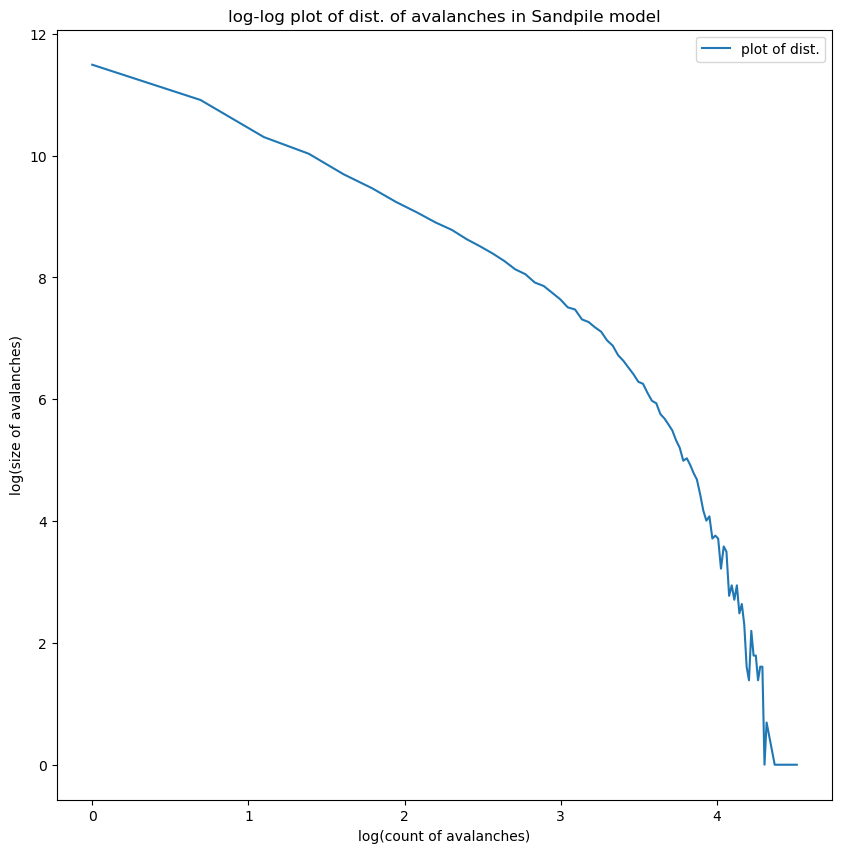

In [73]:
plt.figure(figsize=(10,10))
plt.title("log-log plot of dist. of avalanches in Sandpile model")
plt.xlabel("log(count of avalanches)")
plt.ylabel("log(size of avalanches)")
plt.plot(np.log(values),np.log(counts))
#plt.plot([0,4],[b,a*4 + b])
plt.legend(["plot of dist.","fitted line"])
plt.show()

In [38]:
print("r2 for log(values) and log(counts) is : ",np.corrcoef(np.log(values),np.log(counts))[0][1])

r2 for log(values) and log(counts) is :  -0.9675063706129612


In [39]:
print("slope for line fit on log(values) ans log(counts) is : ",a)

slope for line fit on log(values) ans log(counts) is :  -2.9799381198401598
